In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import funciones_eda

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

Analisis exploratorio de los datos de los tres conjuntos

In [2]:
# Traemos la data
df_games = pd.read_parquet("../Datasets/steam_games_limpio.parquet")
df_items = pd.read_parquet("../Datasets/australian_items_limpio.parquet")
df_reviews = pd.read_parquet("../Datasets/reviews_analisis_sentiment.parquet")

## Games

Daremos un primer vistazo al dataset y exploramos su estructura basica

In [3]:
df_games

,publisher,genres,title,reviews_url,price,early_access,id,developer,year
0,Kotoshiro,Action,Lost Summoner Kitty,http://steamcommunity.com/app/761140/reviews/?...,4.99,False,761140,Kotoshiro,2018.0
0,Kotoshiro,Casual,Lost Summoner Kitty,http://steamcommunity.com/app/761140/reviews/?...,4.99,False,761140,Kotoshiro,2018.0
0,Kotoshiro,Indie,Lost Summoner Kitty,http://steamcommunity.com/app/761140/reviews/?...,4.99,False,761140,Kotoshiro,2018.0
0,Kotoshiro,Simulation,Lost Summoner Kitty,http://steamcommunity.com/app/761140/reviews/?...,4.99,False,761140,Kotoshiro,2018.0
0,Kotoshiro,Strategy,Lost Summoner Kitty,http://steamcommunity.com/app/761140/reviews/?...,4.99,False,761140,Kotoshiro,2018.0
...,...,...,...,...,...,...,...,...,...
32132,Laush Studio,Indie,Russian Roads,http://steamcommunity.com/app/610660/reviews/?...,1.99,False,610660,Laush Dmitriy Sergeevich,2018.0
32132,Laush Studio,Racing,Russian Roads,http://steamcommunity.com/app/610660/reviews/?...,1.99,False,610660,Laush Dmitriy Sergeevich,2018.0
32132,Laush Studio,Simulation,Russian Roads,http://steamcommunity.com/app/610660/reviews/?...,1.99,False,610660,Laush Dmitriy Sergeevich,2018.0
32133,SIXNAILS,Casual,EXIT 2 - Directions,http://steamcommunity.com/app/658870/reviews/?...,4.99,False,658870,"xropi,stev3ns",2017.0


Cuenta con 9 columnas y 71551 registros

In [18]:
funciones_eda.verificar_datos(df_games)

Advertencia: la columna year, tiene valores nulos


,columna,tipo_dato,datos_nulos,porcentaje_nulos,porcentaje_no_nulos
0,publisher,[<class 'str'>],0,0.00,100.00
1,genres,[<class 'str'>],0,0.00,100.00
2,title,[<class 'str'>],0,0.00,100.00
3,reviews_url,[<class 'str'>],0,0.00,100.00
4,price,[<class 'float'>],0,0.00,100.00
5,early_access,[<class 'bool'>],0,0.00,100.00
6,id,[<class 'str'>],0,0.00,100.00
7,developer,[<class 'str'>],0,0.00,100.00
8,year,[<class 'float'>],850,1.19,98.81


Podemos observar que la columna year es de tipo numerico y posee 850 valores nulos que representan un 1.19% de sus datos

In [4]:
# Verificamos tipo de datos 
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71551 entries, 0 to 32133
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     71551 non-null  object 
 1   genres        71551 non-null  object 
 2   title         71551 non-null  object 
 3   reviews_url   71551 non-null  object 
 4   price         71551 non-null  float64
 5   early_access  71551 non-null  bool   
 6   id            71551 non-null  object 
 7   developer     71551 non-null  object 
 8   year          70701 non-null  float64
dtypes: bool(1), float64(2), object(6)
memory usage: 5.0+ MB


Podemos observar que posee columnas como precio, y year que son de tipo numericas y una columna como early_acces que es de tipo boolena, ademas de las columnas de tipo object 

Podemos encontrar lo siguiente:

* Variables categóricas: publisher, genres, title, reviews_url, id, developer, year

* Variables numéricas: price, early_access (convertible a representación numérica)

Calculamos las estadisticas basicos para las variables numericas

In [5]:
df_games.describe()

,price,year
count,71551.000000,70701.000000
mean,8.444274,2015.229233
std,15.767991,2.790492
min,0.000000,1983.000000
25%,1.990000,2015.000000
50%,4.990000,2016.000000
75%,9.990000,2017.000000
max,995.000000,2021.000000


Precio:

* Media: El precio medio de los juegos es de 8,44 dólares.
* Desviación estándar: La desviación estándar es de 15,77 dólares. Esto significa que la mayoría de los precios se encuentran dentro de un rango de unos 30 dólares.
* Mínimo: El precio mínimo es de 0 dólares. Esto significa que hay algunos juegos gratuitos disponibles.
* 25%: El 25% de los juegos tienen un precio de 1,99 dólares o menos.
* 50%: El 50% de los juegos tienen un precio de 4,99 dólares o menos.
* 75%: El 75% de los juegos tienen un precio de 9,99 dólares o menos.
* Máximo: El precio máximo es de 995 dólares. Esto es un outlier, ya que es mucho más alto que el resto de los precios.

Año: 

* Media: El año de lanzamiento medio de los juegos es 2015.
* Desviación estándar: La desviación estándar es de 2,79 años. Esto significa que la mayoría de los juegos se lanzaron entre 2013 y 2017.
* Mínimo: El año de lanzamiento mínimo es 1983. Esto significa que hay algunos juegos antiguos disponibles.
* 25%: El 25% de los juegos se lanzaron en 2015 o antes.
* 50%: El 50% de los juegos se lanzaron entre 2015 y 2016.
* 75%: El 75% de los juegos se lanzaron entre 2016 y 2017.
* Máximo: El año de lanzamiento máximo es 2021.

In [6]:
# seleccionamos columnas 
precio_year = df_games[["price", "year"]]
precio_year

,price,year
0,4.99,2018.0
0,4.99,2018.0
0,4.99,2018.0
0,4.99,2018.0
0,4.99,2018.0
...,...,...
32132,1.99,2018.0
32132,1.99,2018.0
32132,1.99,2018.0
32133,4.99,2017.0


Estamos encontrando que la media de los precios esta por debajo de los 10 dolares, y que tambien tenemos un precio maximo muy alto, calcularemos el porcentaje 

In [7]:
# Calculo del porcentaje
precio_inferior_10 = precio_year[precio_year["price"] < 10].shape[0] / precio_year.shape[0]
precio_inferior_10_red = round(precio_inferior_10, 2)
precio_inferior_10_red

0.8

El porcentaje de juegos con un precio inferior a 10 dolares de 80% aproximadamente, lo que demuestra que la mayoria de os precios se encuentran por debajo de los 10 dolares

In [8]:
# Calcular el valor de la media por año
precio_media_year = precio_year.groupby("year")["price"].mean()


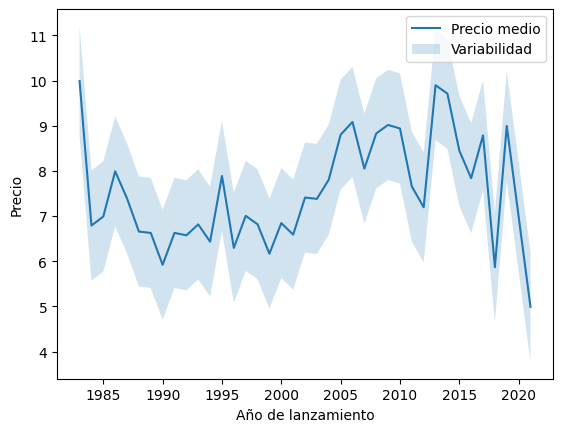

In [9]:
# Agregar una línea de tendencia
plt.plot(precio_media_year, label="Precio medio")

# Agregar bandas de error
plt.fill_between(precio_media_year.index,
                 precio_media_year - precio_media_year.std(),
                 precio_media_year + precio_media_year.std(),
                 alpha=0.2, label="Variabilidad")

# Agregar etiquetas al eje x y al eje y
plt.xlabel("Año de lanzamiento")
plt.ylabel("Precio")

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

Podemos observar como el vaor de los videojuegos ha venido en aumento historicamente desde 1990 hasta mediados entre 2010 y 2015, lo cual nos muestra perfectamente como comenza a hacerse popular el contenido gratuito y los juegos en plataformas moviles por ejmeplo, lo cual ha provocado un cambio en la tendencia en cuanto al valor promedio de los videojuegos

Calculando outliers

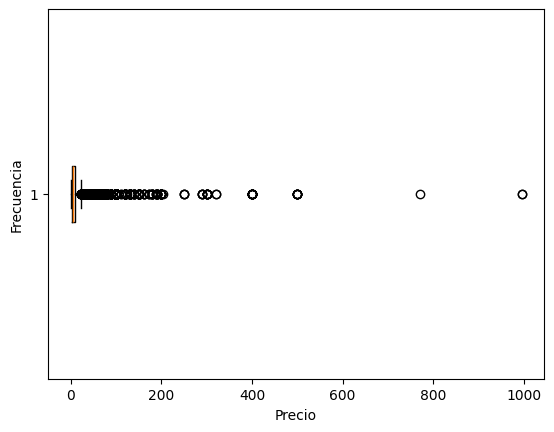

In [10]:
# Crear un diagrama de caja
plt.boxplot(precio_year["price"], vert=False)

# Agregar etiquetas
plt.xlabel("Precio")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()

In [11]:
# Calcular el puntaje z para cada punto de datos y calcular su valor absoluto
z_scores = zscore(df_games[ "price" ]) 
abs_z_scores = np. abs (z_scores) 

# Seleccione los valores atípicos usando un umbral de 3
outliers_games = df_games[abs_z_scores > 3 ] 

In [12]:
outliers_games

,publisher,genres,title,reviews_url,price,early_access,id,developer,year
18,Poppermost Productions,Free to Play,SNOW - Lifetime Pack,http://steamcommunity.com/app/774279/reviews/?...,59.99,False,774279,Poppermost Productions,2018.0
18,Poppermost Productions,Indie,SNOW - Lifetime Pack,http://steamcommunity.com/app/774279/reviews/?...,59.99,False,774279,Poppermost Productions,2018.0
18,Poppermost Productions,Simulation,SNOW - Lifetime Pack,http://steamcommunity.com/app/774279/reviews/?...,59.99,False,774279,Poppermost Productions,2018.0
18,Poppermost Productions,Sports,SNOW - Lifetime Pack,http://steamcommunity.com/app/774279/reviews/?...,59.99,False,774279,Poppermost Productions,2018.0
425,SEGA,Action,SEGA Mega Drive and Genesis Classics,http://steamcommunity.com/app/34270/reviews/?b...,61.99,False,34270,D3T Limited,2010.0
...,...,...,...,...,...,...,...,...,...
30353,"Sector3 Studios, RaceRoom Entertainment AG",Simulation,RaceRoom Racing Experience,http://steamcommunity.com/app/211500/reviews/?...,160.91,False,211500,Sector3 Studios,2013.0
30353,"Sector3 Studios, RaceRoom Entertainment AG",Sports,RaceRoom Racing Experience,http://steamcommunity.com/app/211500/reviews/?...,160.91,False,211500,Sector3 Studios,2013.0
30451,Nevercenter Ltd. Co.,Animation &amp; Modeling,Silo 2,http://steamcommunity.com/app/100400/reviews/?...,99.99,False,100400,Nevercenter Ltd. Co.,2012.0
30477,Degica,Design &amp; Illustration,RPG Maker VX Ace,http://steamcommunity.com/app/220700/reviews/?...,69.99,False,220700,KADOKAWA,2012.0


Se encontraron 747 valores atipicos com podemos observer en esta dataframe

In [13]:
max = outliers_games["price"].max()
max

995.0

Podemos ver que el articulo o videojuego que tiene el valor mas alto tiene un precio de 995 dolares

In [14]:
b = outliers_games[outliers_games["price"]== max]
b

,publisher,genres,title,reviews_url,price,early_access,id,developer,year
12088,"Strata Mixed Reality, Inc.",Animation &amp; Modeling,Strata Spaces VR – Professional Edition Upgrade,http://steamcommunity.com/app/719000/reviews/?...,995.0,False,719000,"Strata Mixed Reality, Inc.",2017.0
12088,"Strata Mixed Reality, Inc.",Design &amp; Illustration,Strata Spaces VR – Professional Edition Upgrade,http://steamcommunity.com/app/719000/reviews/?...,995.0,False,719000,"Strata Mixed Reality, Inc.",2017.0


A qui podemos ver el iten mas caro en la base de datos, con el niombre Strata Spaces VR – Professional Edition Upgrade, el cual es una utilidad para modelar localizaciones en realidad virtual. se ha investigado y a pesar de parecer datos atipicos son productos reales y son necesarios para continuar con nuesto analisis, por lo tanto a pesar de ser un outlier lo mantenderemos en el dataset

### Estudiaremos la columna genres

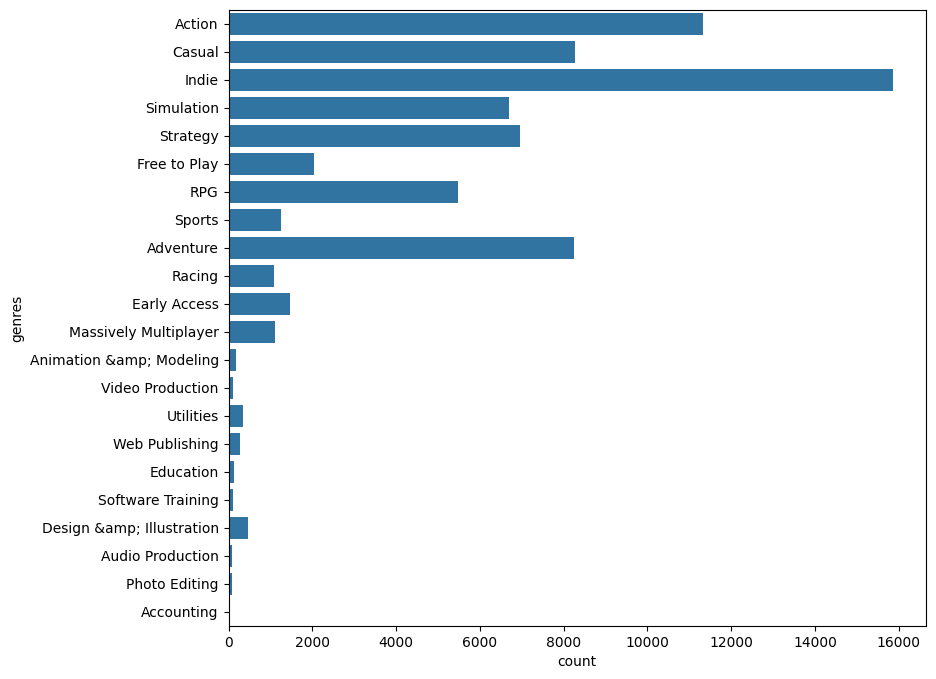

In [21]:
plt.figure(figsize=(9, 8))
sns.countplot(data=df_games, y='genres', orient='h')
plt.show()

Podemos observar la cantidad de videojuagos asociados por genero,donde podemos ver que indie, adventure, casul y action son los generos que mas acumulan itens, claro esta debemos tener en cuanta que un item ouede estar asociado a mas de un genero

In [22]:
funciones_eda.resumen_cant_porcentaje(df_games, "genres")

,Cantidad,Porcentaje
genres,,
Indie,15858,22.16
Action,11319,15.82
Casual,8282,11.57
Adventure,8242,11.52
Strategy,6957,9.72
Simulation,6699,9.36
RPG,5479,7.66
Free to Play,2031,2.84
Early Access,1462,2.04


Aca podemos observar lo que veiamos en el grafico, nos muestra el porcenytaje que representa cada genero en la base de datos

### Cantidad de registros por año de lanzamiento

In [23]:
funciones_eda.resumen_cant_porcentaje(df_games, "year")

,Cantidad,Porcentaje
year,,
2017.0,24967,34.89
2016.0,17667,24.69
2015.0,12256,17.13
2014.0,6341,8.86
2013.0,3016,4.22
2012.0,2106,2.94
2011.0,986,1.38
2010.0,653,0.91
2009.0,486,0.68


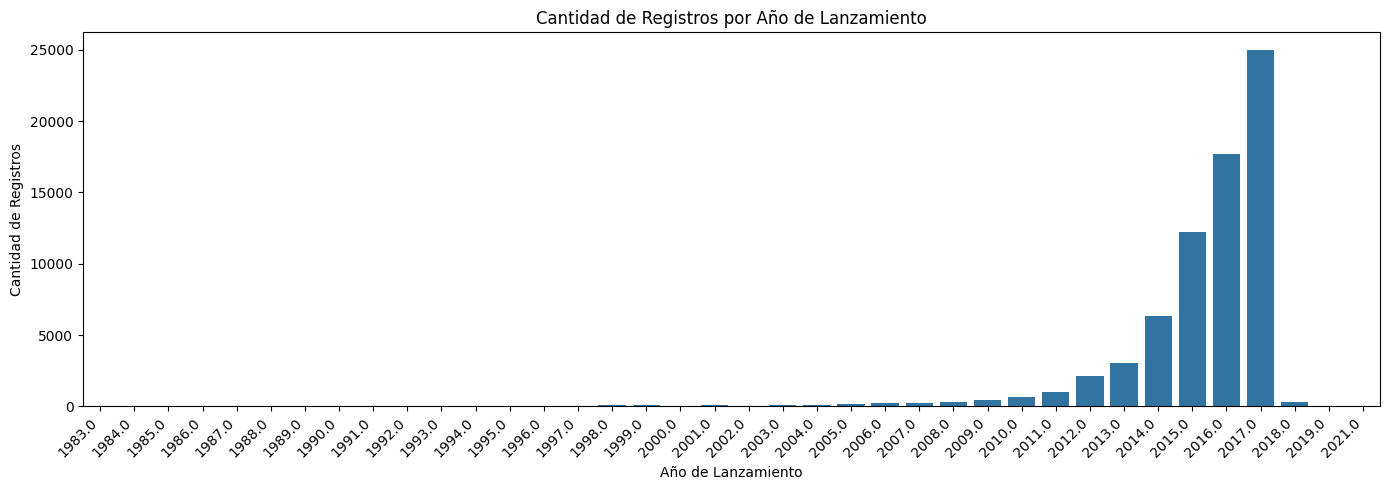

In [24]:
# Frecuencia por año
cantidad_year = df_games["year"].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(14, 5))
sns.barplot(x=cantidad_year.index, y=cantidad_year.values)
plt.xlabel('Año de Lanzamiento') ; plt.ylabel('Cantidad de Registros') ; plt.title('Cantidad de Registros por Año de Lanzamiento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Se ve el crecimiento constante y lento hasta 2012 y luego crece mas rápidamente hasta 2017. A partir de allí, la plataforma limitó la forma de obtener las estadísticas, por eso se ven muchos menos registros.


### Columnas 'publisher' y 'developer'

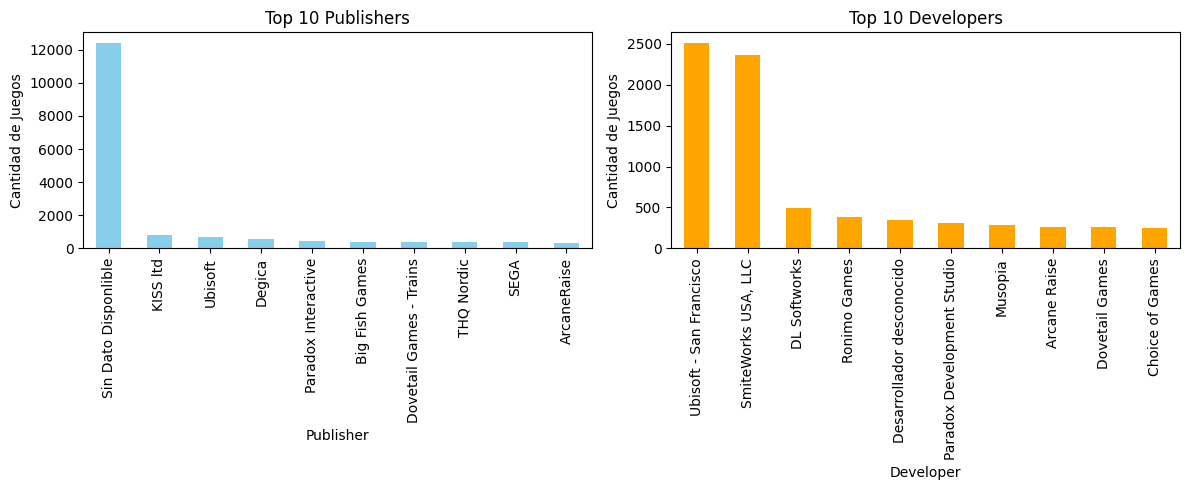

In [39]:
# Contar la cantidad de juegos por publisher
conteo_publisher = df_games['publisher'].value_counts()

# Contar la cantidad de juegos por developer
conteo_developer = df_games['developer'].value_counts()

# Crear una figura con dos subplots uno al lado del otro
plt.figure(figsize=(12, 5))

# Primer subplot para los publishers
plt.subplot(1, 2, 1)
conteo_publisher[:10].plot(kind='bar', color='skyblue')
plt.xlabel('Publisher') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Publishers')

# Segundo subplot para los developers
plt.subplot(1, 2, 2)
conteo_developer[:10].plot(kind='bar', color='orange')
plt.xlabel('Developer') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Developers')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

En el caso de los publicista de juegos, la mayor cantidad no dispone del dato y en el caso de los desarrolladores, Ubisoft y SmiteWorks son los desarrolladores que mas juegos han desarrollado para la plataforma.

## Reviews

Abrimos el dataset para comenzar la exploracion

In [25]:
df_reviews

,user_id,user_url,reviews_item_id,reviews_recommend,reviews_date,year,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1250,True,2011-11-05,2011,2
1,js41637,http://steamcommunity.com/id/js41637,251610,True,2014-06-24,2014,2
3,doctr,http://steamcommunity.com/id/doctr,250320,True,2013-10-14,2013,2
4,maplemage,http://steamcommunity.com/id/maplemage,211420,True,2014-04-15,2014,1
5,Wackky,http://steamcommunity.com/id/Wackky,249130,True,2014-05-05,2014,1
...,...,...,...,...,...,...,...
231273,kushikushigani,http://steamcommunity.com/id/kushikushigani,332310,True,2015-12-30,2015,1
231291,How51,http://steamcommunity.com/id/How51,440,True,2014-08-15,2014,0
231293,76561198111410893,http://steamcommunity.com/profiles/76561198111...,304930,True,2014-08-02,2014,2
231419,zaza147,http://steamcommunity.com/id/zaza147,265630,True,2015-07-31,2015,2


Podemos observar el dataframe con 7 columnas y 47599 filas, ademas podemos observar que contamos con el analisis de sentimiento, donde conocemos sus valores como 0 = negativo, 1 = neutral, 2 = positivo

In [27]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47599 entries, 0 to 231499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             47599 non-null  object
 1   user_url            47599 non-null  object
 2   reviews_item_id     47599 non-null  object
 3   reviews_recommend   47599 non-null  bool  
 4   reviews_date        47599 non-null  object
 5   year                47599 non-null  object
 6   sentiment_analysis  47599 non-null  int64 
dtypes: bool(1), int64(1), object(5)
memory usage: 2.6+ MB


Observamos los tipos de datos y los valores nulos

In [28]:
funciones_eda.verificar_datos(df_reviews)

,columna,tipo_dato,datos_nulos,porcentaje_nulos,porcentaje_no_nulos
0,user_id,[<class 'str'>],0,0.0,100.0
1,user_url,[<class 'str'>],0,0.0,100.0
2,reviews_item_id,[<class 'str'>],0,0.0,100.0
3,reviews_recommend,[<class 'bool'>],0,0.0,100.0
4,reviews_date,[<class 'str'>],0,0.0,100.0
5,year,[<class 'str'>],0,0.0,100.0
6,sentiment_analysis,[<class 'int'>],0,0.0,100.0


Convertimos la columna year en int

In [29]:
df_reviews["year"] = df_reviews["year"].astype(int)

Observamos como esta conformada la columna reviews_date

In [32]:
df_reviews.dtypes

user_id               object
user_url              object
reviews_item_id       object
reviews_recommend       bool
reviews_date          object
year                   int32
sentiment_analysis     int64
dtype: object

In [31]:
df_reviews["reviews_date"].unique()

array(['2011-11-05', '2014-06-24', '2013-10-14', ..., '2011-01-03',
       '2010-12-12', '2011-07-16'], dtype=object)

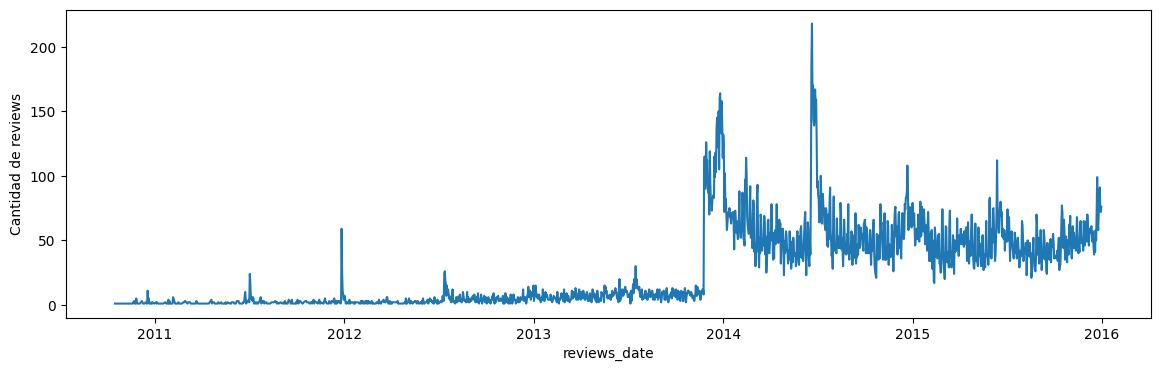

In [33]:
# Se hace un dataframe auxiliar para analizar solo las fechas (hay campos con 'Datos no disponibles')
df = df_reviews[df_reviews["reviews_date"].str.match(r"^\d{4}-\d{2}-\d{2}$")]
# Convierte a formato fecha
df["reviews_date"] = pd.to_datetime(df["reviews_date"])
# Calcula la cantidad de review por fecha
df_counts = df.groupby("reviews_date").count()

# Grafica
plt.figure(figsize=(14, 4))
sns.lineplot(data=df_counts, x="reviews_date", y="reviews_recommend")
plt.ylabel('Cantidad de reviews')
plt.show()

Se observa que antes del 2014 la cantidad de reviews por día es bajo, con algunos picos puntuales y luego aumenta considerablemente la cantidad de comentarios con un pico máximo el 21-06-2014 con 218 comentarios en un solo día.

Vamos a corroborrar esta conclusion del grafico

In [34]:
print('Días de cantidad pico de reviews')
df_counts.sort_values(by='reviews_recommend', ascending=False)['reviews_recommend'][:5]

Días de cantidad pico de reviews


reviews_date
2014-06-21    218
2014-06-20    187
2014-06-23    170
2014-06-27    167
2013-12-26    164
Name: reviews_recommend, dtype: int64

Aca podemos observar en numeros lo que nos indica el grafico

### Se exploran las columnas 'sentiment_analysis' y 'reviews_recommend'.

In [36]:
funciones_eda.resumen_cant_porcentaje(df_reviews, "sentiment_analysis")

,Cantidad,Porcentaje
sentiment_analysis,,
2,28519,59.92
1,14981,31.47
0,4099,8.61


In [37]:
funciones_eda.resumen_cant_porcentaje(df_reviews, 'reviews_recommend')

,Cantidad,Porcentaje
reviews_recommend,,
True,42753,89.82
False,4846,10.18


De los registros de reviews casi el 62% de los reviews reflejan sentimientos neutrales, casi el 30% reflejan sentimientos positivos hacia el juego y menos del 9% fue negativo. Pero en el 88% de los reviews se recomiendan los juegos que consumen.

In [38]:
# Se agrupa por 'sentiment_analysis' y 'reviews_recommend'
df_agrupado = df_reviews.groupby(['sentiment_analysis', 'reviews_recommend'])
# Se cuentan la cantidad de reviews en cada grupo
cantidad_grupo = df_agrupado.size()
# Se calcula el porcentaje por cada grupo
porcentaje_grupo = 100 * df_agrupado.size() / len(df_reviews)
# Se crea un datafram con el resumen
sentimiento_recomendacion = pd.DataFrame({
    "Cantidad": cantidad_grupo,
    "Porcentaje": porcentaje_grupo
})
sentimiento_recomendacion

Cantidad  Porcentaje
sentiment_analysis reviews_recommend                      
0                  False                  1163    2.443329
                   True                   2936    6.168197
1                  False                  1856    3.899242
                   True                  13125   27.574109
2                  False                  1827    3.838316
                   True                  26692   56.076808

Se puede ver que el porcentaje respecto del total de los reviews que casi el 54% de los reviews que reflejan un sentimiento neutral

## Items

Lectura de datos

In [40]:
df_items

,user_id,item_id,item_name,playtime_forever
0,76561197970982479,10,Counter-Strike,6
1,76561197970982479,20,Team Fortress Classic,0
2,76561197970982479,30,Day of Defeat,7
3,76561197970982479,40,Deathmatch Classic,0
4,76561197970982479,50,Half-Life: Opposing Force,0
...,...,...,...,...
999995,shortevogaming,333930,Dirty Bomb,83
999996,shortevogaming,366844,Call of Duty: Black Ops III - Awakening DLC Pack,0
999997,shortevogaming,377160,Fallout 4,302
999998,shortevogaming,384190,ABZU,0


Revisamos, tipos de datos, datos nulos y cantidad de datos

In [43]:
# Se revisan tipos de datos y existencias de nulos
funciones_eda.verificar_datos(df_items)

,columna,tipo_dato,datos_nulos,porcentaje_nulos,porcentaje_no_nulos
0,user_id,[<class 'str'>],0,0.0,100.0
1,item_id,[<class 'str'>],0,0.0,100.0
2,item_name,[<class 'str'>],0,0.0,100.0
3,playtime_forever,[<class 'int'>],0,0.0,100.0


ste conjunto de datos tiene 4 columnas . Para recordar, contiene la información relacionada los usuarios y los juegos que consumen como el tiempo acumulado (en minutos) que han jugado a un juego, la cantidad de items que consumen así como los identificadores de los juegos que consumen y del propio usuario y la url del perfil del mismo.

Playtime_forever

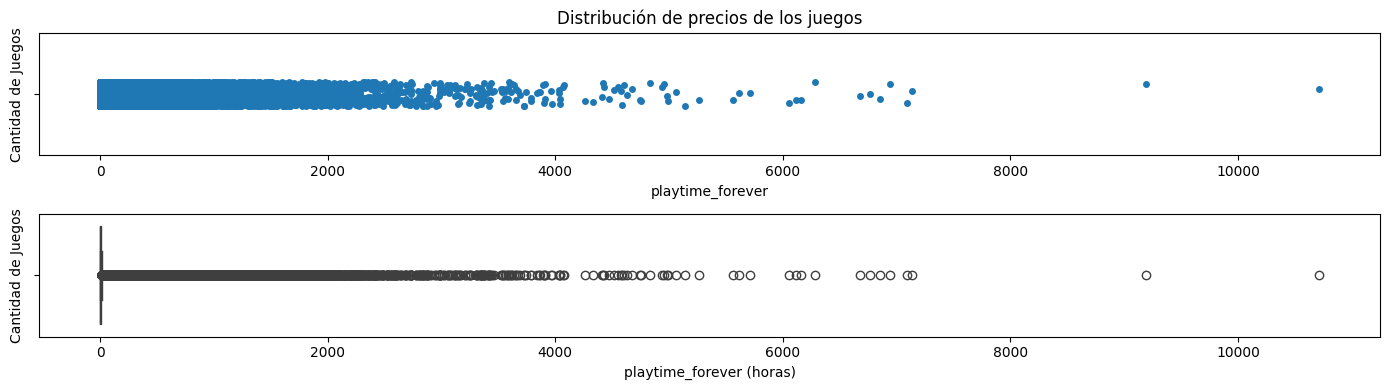

In [44]:
df_items['playtime_hours'] = df_items['playtime_forever'] / 60

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=df_items, x='playtime_hours', ax=ax1)
ax1.set_xlabel('playtime_forever') ; ax1.set_ylabel('Cantidad de Juegos') ; ax1.set_title('Distribución de precios de los juegos')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=df_items, x='playtime_hours', ax=ax2)
ax2.set_xlabel('playtime_forever (horas)') ; ax2.set_ylabel('Cantidad de Juegos')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

In [47]:
estadisticas = df_items['playtime_hours'].describe()
print(f'El precio medio (mediana) de los juegos es de: {round(estadisticas[5],2)}')
print(f'El precio promedio (mean) de los juegos es de: {round(estadisticas[1],2)}')
print(f'El 75% de los juegos tienen un precio menor de: {round(estadisticas[6],2)}')
funciones_eda.bigote_max(df_items['playtime_hours'])

El precio medio (mediana) de los juegos es de: 0.73
El precio promedio (mean) de los juegos es de: 18.84
El 75% de los juegos tienen un precio menor de: 6.62
El bigote superior de la variable playtime_hours se ubica en: 16.54
Hay 148927 valores atípicos en la variable playtime_hours


Se puede observar que cada usuario, por juego, pasa un tiempo medio de 0.57 hs jugando y el 75% de los jugadores estuvieron menos de 6 hs jugando a un juego, pero se observa una gran cantidad de valores atípicos por encima de las 14.79 hs que juega cada usuario a un juego. Esto podría deberse al uso de bots que utilizan el mismo perfil de usuario para jugar en simultaneo, lo que generaría una distorsión de los tiempos reales de juego.